In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'datasets/train'
data_test_path = 'datasets/test'
data_val_path = 'datasets/validation'

In [3]:
img_width = 180
img_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_width, img_height),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width, img_height),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


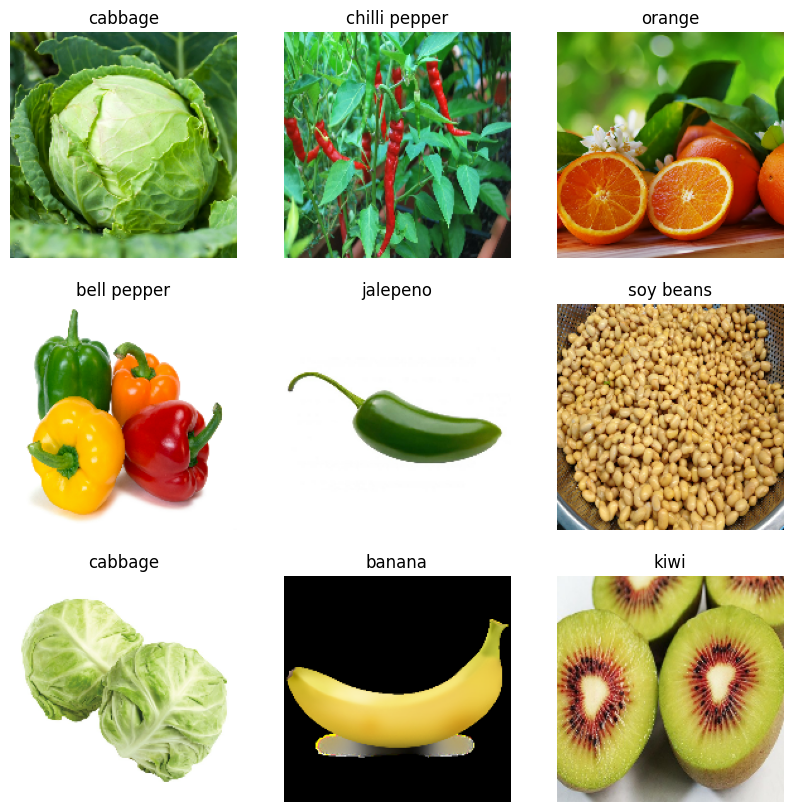

In [8]:
plt.figure(figsize=(10, 10))

for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dropout(0.2),

    layers.Dense(128),
    layers.Dense(len(data_cat))
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [10]:
epochs_size = 25

history = model.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs_size,
    batch_size=32,
    verbose=1
)

Epoch 1/25
98/98 [==============================] - 28s 269ms/step - loss: 3.2025 - accuracy: 0.1159 - val_loss: 2.2855 - val_accuracy: 0.3219
Epoch 2/25
98/98 [==============================] - 24s 233ms/step - loss: 2.3429 - accuracy: 0.3384 - val_loss: 1.4763 - val_accuracy: 0.6011
Epoch 3/25
98/98 [==============================] - 23s 228ms/step - loss: 1.7277 - accuracy: 0.5181 - val_loss: 0.8420 - val_accuracy: 0.7977
Epoch 4/25
98/98 [==============================] - 23s 229ms/step - loss: 1.0922 - accuracy: 0.6886 - val_loss: 0.5071 - val_accuracy: 0.8889
Epoch 5/25
98/98 [==============================] - 23s 228ms/step - loss: 0.5718 - accuracy: 0.8398 - val_loss: 0.3379 - val_accuracy: 0.9430
Epoch 6/25
98/98 [==============================] - 23s 230ms/step - loss: 0.2995 - accuracy: 0.9201 - val_loss: 0.4872 - val_accuracy: 0.9373
Epoch 7/25
98/98 [==============================] - 23s 227ms/step - loss: 0.2176 - accuracy: 0.9490 - val_loss: 0.3591 - val_accuracy: 0.9316

Text(0.5, 1.0, 'Loss')

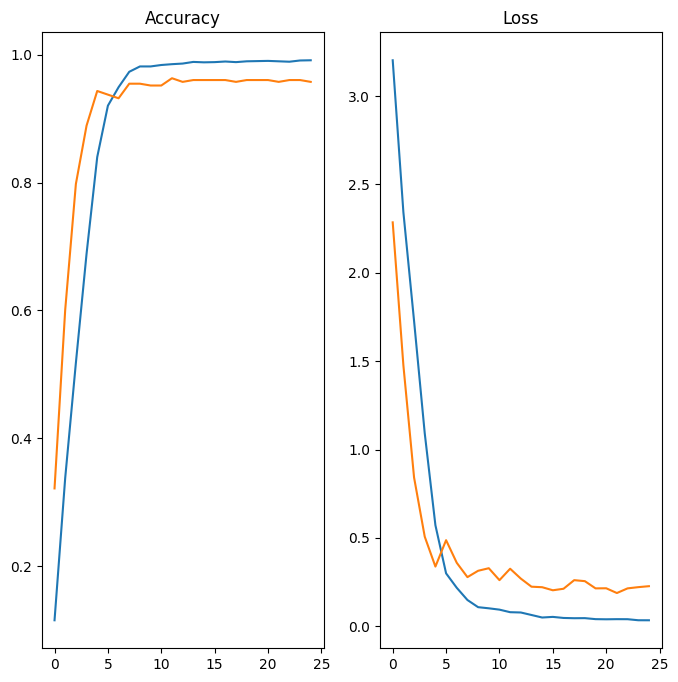

In [11]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')

In [12]:
image = 'prediction/2.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_width, img_height))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [13]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 89ms/step


In [14]:
score = tf.nn.softmax(predict)
print(data_cat[np.argmax(score)])
print(np.max(score) * 100)

paprika
74.94899034500122


In [15]:
model.save('image_classify.keras')